# EMSC 2020.1
Exercício de Modelagem e Simulação Numérica realizado para a disciplina 'Mecânica 2' (PME3200). Enunciado disponível [neste link](http://sites.poli.usp.br/d/pme3200/EMSC2020_1.pdf)

Autor: Ariel Guerreiro

## Descrevendo o problema

Sistema massa-mola-amortecedor, com um grau de liberdade (horizontal/x) com forçamento externo F(t) e sem atrito.

Obter a equação diferencial que descreve o movimento do sistema, com as seguintes características (m, k, c):

$$\ddot x = f(x, \dot x, t, m, k, c, F(t))$$

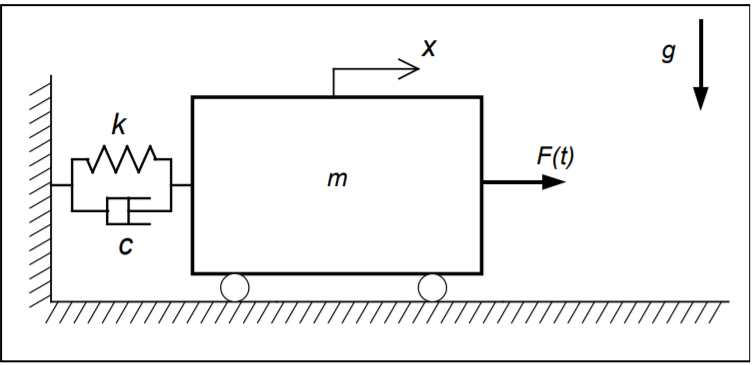

## Implementação Numérica

O movimento se trata de um Movimento Harmônico Amortecido e Forçado (MHAF), que pode ser descrito pela seguinte equação geral:

$$\begin{equation} \ddot x + \frac{c}{m}\dot x + \frac{k}{m}x = \frac{F(t)}{m} \iff \ddot x = \frac{F(t)}{m} - \frac{c}{m}\dot x -\frac{k}{m} \end{equation}x$$

Escrevendo nos vetores {${y}$} e {${\dot y}$}, temos:

$$\{y\} = \begin{Bmatrix} x \\ \dot x\end{Bmatrix} \text{,} \{\dot y\} = \begin{Bmatrix} \dot x \\ \frac{F(t)}{m} - \frac{c}{m}\dot x -\frac{k}{m}\end{Bmatrix}$$

A simulação pode então ser feita por meio de integração numérica

## Aplicação em Python

In [1]:
#Importando as bibliotecas necessárias
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint as ode

### Letras (a) a (c) (F(t) = 0):

In [2]:
#criando a lista de parâmetros do sistema
m = 10 #kg
k = 3553.0 #N/m
c = 37.7 #Ns/m
g = 9.81 #m/s^2

params = [m, k, c, g]

print(params)

[10, 3553.0, 37.7, 9.81]


In [3]:
#definindo a função para o sistema
def carro(y, t, params):
    m = params[0]
    k = params[1]
    c = params[2]
    g = params[3]
    
    ydot = [0,0]
    
    ydot[0] = y[1]
    ydot[1] = -c*y[1]/m -k*y[0]/m
    
    return ydot

In [4]:
#funcao para definir os valores do tempo
def tempo(ti, tf, h=0.01):
    return np.arange(ti, tf, h)

In [5]:
#funcao para criar os 4 gráficos da análise
def graficos(titulo, X, V, t, F=0):
    fig, ax= plt.subplots(2, 2)
    fig.suptitle(titulo)
    
    ax[0][0].plot(t, X)
    ax[0][0].set_title('posição x tempo')
    
    ax[0][1].plot(t, V)
    ax[0][1].set_title('velocidade x tempo')
    
    ax[1][0].plot(V, X)
    ax[1][0].set_title('posição x velocidade')
    
    if F != 0:
        ax[1][1].plot(t, F)
        ax[1][1].set_title('força x tempo')

    fig.tight_layout()    
    plt.show()

#### Caso A

In [6]:
x0 = 0.1
xdot0 = 0.0

ya = [x0, xdot0]

In [7]:
ti = 0
tf = 3

ta = tempo(ti, tf)

In [8]:
Ya = ode(carro, ya, ta, args= (params,))

In [9]:
Xa = Ya[:,0]
Va = Ya[:,1]

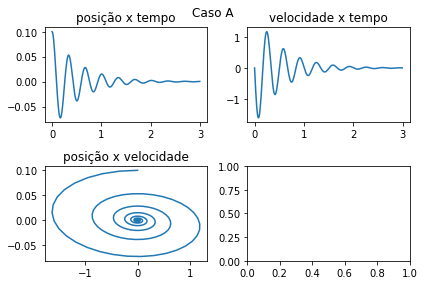

In [10]:
titulo = 'Caso A'

graficos(titulo, Xa, Va, ta)

#### Caso B

In [11]:
x0 = 0
xdot0 = 1.0

yb = [x0, xdot0]

In [12]:
ti = 0
tf = 3

tb = tempo(ti, tf)

In [13]:
Yb = ode(carro, yb, tb, args = (params,))

In [14]:
Xb = Yb[:,0]
Vb = Yb[:,1]

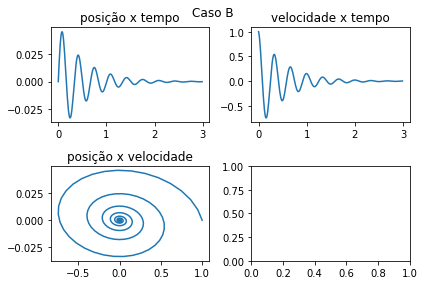

In [15]:
titulo = 'Caso B'

graficos(titulo, Xb, Vb, tb)

#### Caso C

In [16]:
#Mudanca do amortecimento
params_c = params

params_c[2] = 377

In [17]:
x0 = 0.1
xdot0 = 1

yc = [x0, xdot0]

In [18]:
ti = 0
tf = 3

tc = tempo(ti, tf)

In [19]:
Yc = ode(carro, yc, tc, args = (params_c,))

In [20]:
Xc = Yc[:,0]
Vc = Yc[:,1]

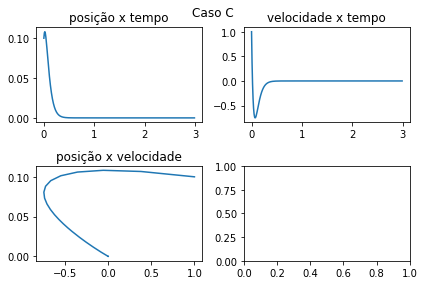

In [21]:
titulo = 'Caso C'

graficos(titulo, Xc, Vc, tc)